# **GrowKids: Aplikasi Prediksi Risiko Stunting Berbasis AI**

**GrowKids** adalah aplikasi berbasis AI yang dirancang untuk membantu orang tua dan tenaga kesehatan dalam **mendeteksi risiko stunting secara dini** pada anak. Dengan memasukkan data sederhana seperti **tinggi badan, berat badan, usia, jenis kelamin, dan status ASI**, aplikasi ini akan memberikan prediksi probabilitas risiko stunting dan rekomendasi nutrisi serta edukasi yang sesuai.

Teknologi yang digunakan:
- Python (Pandas, Sklearn)
- Model klasifikasi K-Nearest Neighbors (KNN)
- Preprocessing standar (StandardScaler)
- Visualisasi hasil & evaluasi performa model
- Simulasi interaktif berbasis input pengguna

---

Dengan pendekatan ini, **GrowKids** diharapkan dapat berkontribusi dalam mengurangi angka stunting di Indonesia melalui solusi digital yang mudah digunakan dan edukatif.

In [1]:
# Import Library

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

## Analisis Data Eksploratif (EDA)

### 1. Import dan Load Data

Mengambil data CSV terkait Stunting melalui Kaggle dan untuk mempermudah data diupload ke Github, lalu menampilkannya untuk pengecekan awal.

In [2]:

# Link RAW GitHub
url = 'https://raw.githubusercontent.com/Nadira173/Nadira-s_Portofolio/main/Stunting_Dataset.csv'

# Load CSV langsung dari GitHub
df = pd.read_csv(url)

# Cek data
print(df.head())
print(df.shape)


   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0    Male   17           3.0            49         10.0         72.2   
1  Female   11           2.9            49          2.9         65.0   
2    Male   16           2.9            49          8.5         72.2   
3    Male   31           2.8            49          6.4         63.0   
4    Male   15           3.1            49         10.5         49.0   

  Breastfeeding Stunting  
0            No       No  
1            No      Yes  
2            No      Yes  
3            No      Yes  
4            No      Yes  
(10000, 8)


In [3]:
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB
None


In [5]:
df.columns

Index(['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight',
       'Body Length', 'Breastfeeding', 'Stunting'],
      dtype='object')

### 2. Pemeriksaan dan Penggantian Nama Kolom
Mengganti nama kolom agar lebih sesuai dengan penamaan Bahasa Indonesia dan mudah dipahami.

In [6]:
df.rename(columns={
    'Gender': 'jenis_kelamin',
    'Age': 'umur_bulan',
    'Birth Weight': 'berat_lahir',
    'Birth Length': 'tinggi_lahir',
    'Body Weight': 'berat_badan',
    'Body Length': 'tinggi_badan',
    'Breastfeeding': 'asi_eksklusif',
    'Stunting': 'stunting'
}, inplace=True)


In [7]:
# Menghapus kolom status stunting
df.drop(columns=['stunting'], inplace=True)


In [8]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif
0,Male,17,3.0,49,10.0,72.2,No
1,Female,11,2.9,49,2.9,65.0,No
2,Male,16,2.9,49,8.5,72.2,No
3,Male,31,2.8,49,6.4,63.0,No
4,Male,15,3.1,49,10.5,49.0,No
...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No
9996,Female,12,2.8,48,7.7,63.0,No
9997,Male,16,2.8,49,7.7,49.0,No
9998,Male,14,2.8,49,10.0,69.0,No


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  10000 non-null  object 
 1   umur_bulan     10000 non-null  int64  
 2   berat_lahir    10000 non-null  float64
 3   tinggi_lahir   10000 non-null  int64  
 4   berat_badan    10000 non-null  float64
 5   tinggi_badan   10000 non-null  float64
 6   asi_eksklusif  10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB
None


Kolom `stunting` dihapus karena kita akan menentukan status stunting berdasarkan referensi WHO, dimulai dari perhitungan Z-Score. Ini dilakukan agar proses analisis benar-benar dimulai dari nol dan lebih transparan.

### 3. Pemeriksaan Nilai Unik dan Penanganan Missing Value
Melihat nilai unik pada variabel kategorikal dan menangani nilai kosong jika ada.

In [10]:
# Cek nilai unik
print(df['asi_eksklusif'].unique())


['No']


In [11]:
print(df['jenis_kelamin'].unique())


['Male' 'Female']


In [12]:
import pandas as pd



# Isi nilai kosong (jika ada)
df['jenis_kelamin'].fillna('Unknown', inplace=True)
df['asi_eksklusif'].fillna('Unknown', inplace=True)

# Konversi ke tipe kategori
df['jenis_kelamin'] = df['jenis_kelamin'].astype('category')
df['asi_eksklusif'] = df['asi_eksklusif'].astype('category')

# Encode kategori menjadi angka
df['jenis_kelamin'] = df['jenis_kelamin'].cat.codes
df['asi_eksklusif'] = df['asi_eksklusif'].cat.codes


<ipython-input-12-c5d65619e237>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['jenis_kelamin'].fillna('Unknown', inplace=True)
<ipython-input-12-c5d65619e237>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [13]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif
0,1,17,3.0,49,10.0,72.2,0
1,0,11,2.9,49,2.9,65.0,0
2,1,16,2.9,49,8.5,72.2,0
3,1,31,2.8,49,6.4,63.0,0
4,1,15,3.1,49,10.5,49.0,0
...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0
9996,0,12,2.8,48,7.7,63.0,0
9997,1,16,2.8,49,7.7,49.0,0
9998,1,14,2.8,49,10.0,69.0,0


### 4. Visualisasi Distribusi Umur Anak
Melihat frekuensi setiap nilai umur anak dalam satuan bulan.

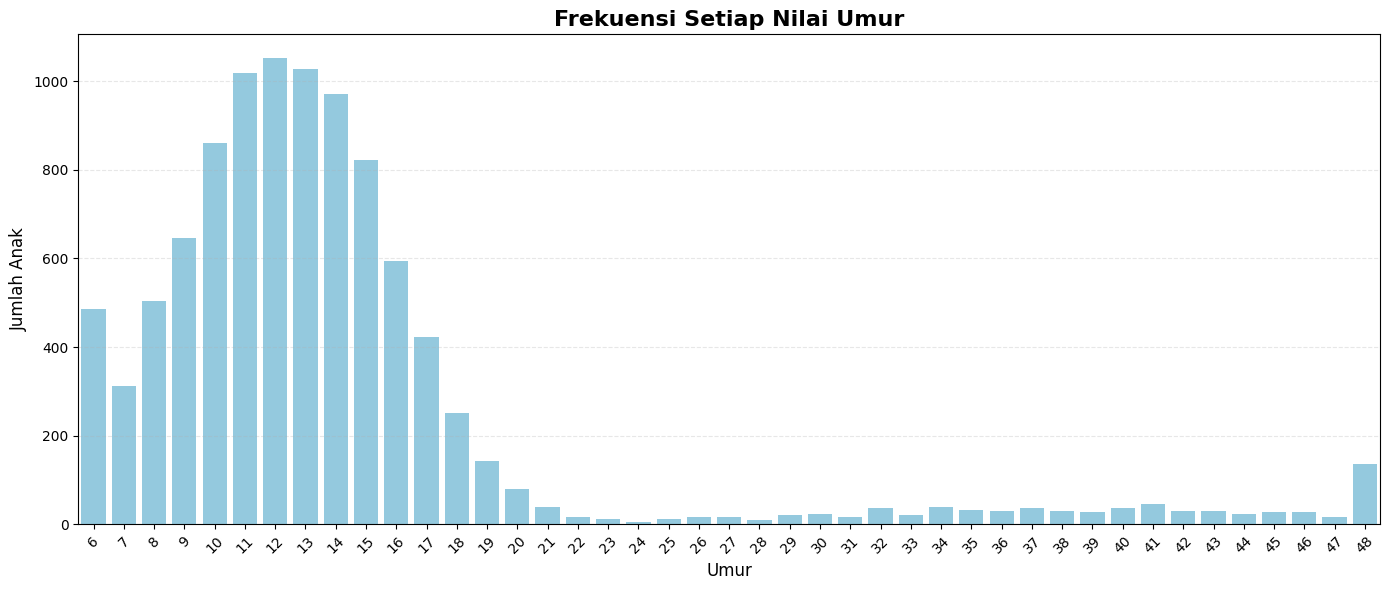

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah anak untuk setiap nilai umur (dalam bulan)
umur_counts = df['umur_bulan'].value_counts().sort_index()

# Visualisasi dengan diagram batang
plt.figure(figsize=(14, 6))
sns.barplot(x=umur_counts.index, y=umur_counts.values, color='skyblue')

plt.title('Frekuensi Setiap Nilai Umur', fontsize=16, weight='bold')
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Jumlah Anak', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Filter Data Berdasarkan Umur ≤ 24 Bulan

In [15]:
# Hapus baris di mana Umur (bulan) lebih dari 24
df = df[df['umur_bulan'] <= 24]


Kami membatasi data hingga umur 24 bulan karena tujuan analisis ini adalah fokus pada periode emas pertumbuhan anak (0–24 bulan). Prosedur perhitungan Z-score dan penentuan stunting tetap sama untuk semua umur, selama referensi tabel WHO digunakan dengan benar.


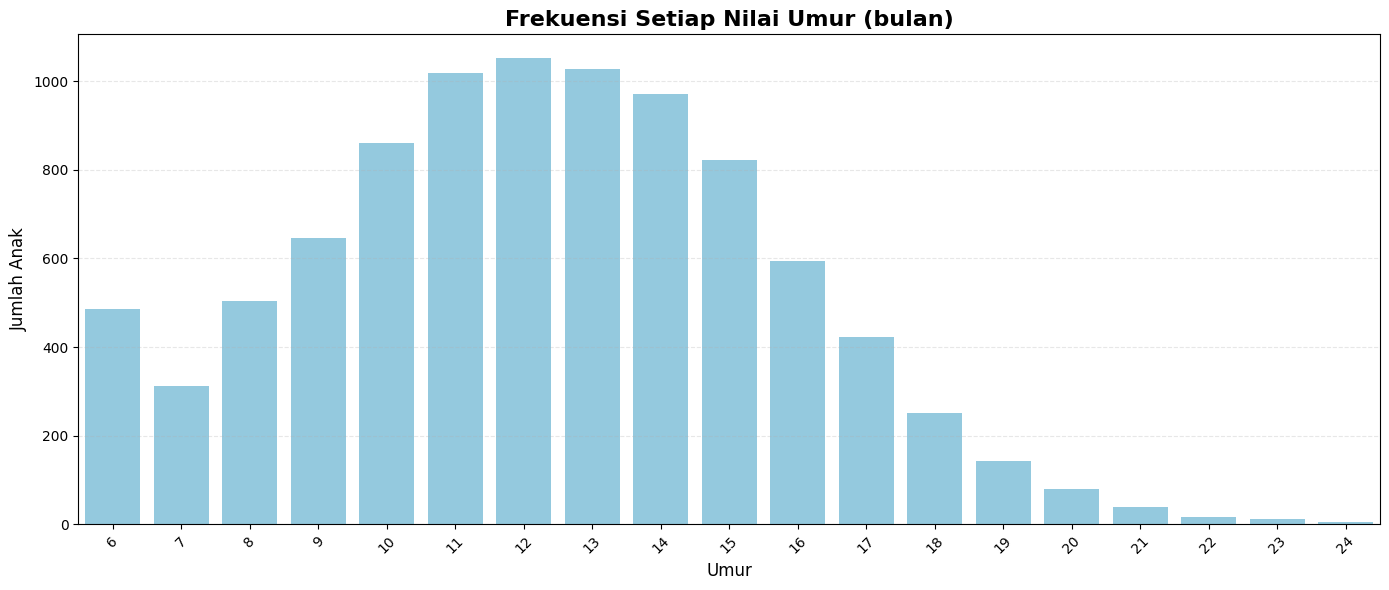

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi tiap nilai umur unik
umur_counts = df['umur_bulan'].value_counts().sort_index()

# Visualisasikan dengan diagram batang
plt.figure(figsize=(14, 6))
sns.barplot(x=umur_counts.index, y=umur_counts.values, color='skyblue')

plt.title('Frekuensi Setiap Nilai Umur (bulan)', fontsize=16, weight='bold')
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Jumlah Anak', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## DATA WHO

Data WHO ini penting sebagai acuan dalam menghitung status gizi berdasarkan panjang badan anak usia 0–24 bulan. WHO memberikan median dan standar deviasi panjang badan berdasarkan umur dan jenis kelamin.

In [17]:
import pandas as pd

# WHO standard untuk anak laki-laki (Months 0 - 5)
who_boys = {
    0: {"median": 49.9, "sd": (51.8 - 49.9)},
    1: {"median": 54.7, "sd": (56.7 - 54.7)},
    2: {"median": 58.4, "sd": (60.4 - 58.4)},
    3: {"median": 61.4, "sd": (63.5 - 61.4)},
    4: {"median": 63.9, "sd": (66.0 - 63.9)},
    5: {"median": 65.9, "sd": (68.0 - 65.9)},
    6: {"median": 67.6, "sd": (69.8 - 67.6)},
    7: {"median": 69.2, "sd": (71.5 - 69.2)},
    8: {"median": 70.6, "sd": (72.9 - 70.6)},
    9: {"median": 72.0, "sd": (74.3 - 72.0)},
    10: {"median": 73.3, "sd": (75.6 - 73.3)},
    11: {"median": 74.5, "sd": (76.9 - 74.5)},
    12: {"median": 75.7, "sd": (78.1 - 75.7)},
    13: {"median": 76.9, "sd": (79.3 - 76.9)},
    14: {"median": 78.0, "sd": (80.5 - 78.0)},
    15: {"median": 79.1, "sd": (81.7 - 79.1)},
    16: {"median": 80.2, "sd": (82.8 - 80.2)},
    17: {"median": 81.2, "sd": (83.9 - 81.2)},
    18: {"median": 82.3, "sd": (85.0 - 82.3)},
    19: {"median": 83.2, "sd": (86.0 - 83.2)},
    20: {"median": 84.2, "sd": (87.0 - 84.2)},
    21: {"median": 85.1, "sd": (88.0 - 85.1)},
    22: {"median": 86.0, "sd": (89.0 - 86.0)},
    23: {"median": 87.0, "sd": (90.0 - 87.0)},
    24: {"median": 87.8, "sd": (90.9 - 87.8)}
}


who_girls = {
    0: {"median": 49.1, "sd": (51.0 - 49.1)},
    1: {"median": 53.7, "sd": (55.6 - 53.7)},
    2: {"median": 57.1, "sd": (59.1 - 57.1)},
    3: {"median": 59.8, "sd": (61.9 - 59.8)},
    4: {"median": 62.1, "sd": (64.3 - 62.1)},
    5: {"median": 64.0, "sd": (66.2 - 64.0)},
    6: {"median": 65.7, "sd": (68.0 - 65.7)},
    7: {"median": 67.3, "sd": (69.6 - 67.3)},
    8: {"median": 68.7, "sd": (71.1 - 68.7)},
    9: {"median": 70.1, "sd": (72.6 - 70.1)},
    10: {"median": 71.5, "sd": (73.9 - 71.5)},
    11: {"median": 72.8, "sd": (75.2 - 72.8)},
    12: {"median": 74.0, "sd": (76.4 - 74.0)},
    13: {"median": 75.2, "sd": (77.6 - 75.2)},
    14: {"median": 76.4, "sd": (78.9 - 76.4)},
    15: {"median": 77.5, "sd": (80.0 - 77.5)},
    16: {"median": 78.6, "sd": (81.2 - 78.6)},
    17: {"median": 79.7, "sd": (82.3 - 79.7)},
    18: {"median": 80.7, "sd": (83.6 - 80.7)},
    19: {"median": 81.7, "sd": (84.7 - 81.7)},
    20: {"median": 82.7, "sd": (85.7 - 82.7)},
    21: {"median": 83.7, "sd": (86.8 - 83.7)},
    22: {"median": 84.5, "sd": (87.7 - 84.5)},
    23: {"median": 85.4, "sd": (88.6 - 85.4)},
    24: {"median": 86.4, "sd": (89.6 - 86.4)},
}



Dapat terlihat di sini adalah referensi data dari WHO yang akan kita gunakan untuk acuannya, di sini terdapat data balita dari umur 0-24 bulan dan dibedakan juga berdasarkan jenis kelaminnya


### 1. Menghitung Z-Score
Z-Score digunakan untuk menilai status pertumbuhan anak dengan membandingkan tinggi badan aktual terhadap standar WHO berdasarkan umur dan jenis kelamin.

In [18]:
# Fungsi untuk menghitung Z-Score
def hitung_z_score(jenis_kelamin, umur_bulan, tinggi_badan):
    # Gunakan referensi WHO sesuai jenis kelamin
    referensi = who_boys if jenis_kelamin == 1 else who_girls

    # Jika umur tidak tersedia di referensi, kembalikan None
    if umur_bulan not in referensi:
        return None

    median = referensi[umur_bulan]["median"]
    sd = referensi[umur_bulan]["sd"]

    # Cegah pembagian dengan nol
    if sd == 0:
        return None

    # Hitung Z-Score
    z = (tinggi_badan - median) / sd
    return round(z, 2)


In [19]:
# Terapkan fungsi Z-Score ke setiap baris dalam dataframe
df['z_score'] = df.apply(lambda row: hitung_z_score(
    row['jenis_kelamin'],
    row['umur_bulan'],
    row['tinggi_badan']
), axis=1)


<ipython-input-19-435f56212e9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = df.apply(lambda row: hitung_z_score(


In [20]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif,z_score
0,1,17,3.0,49,10.0,72.2,0,-3.33
1,0,11,2.9,49,2.9,65.0,0,-3.25
2,1,16,2.9,49,8.5,72.2,0,-3.08
4,1,15,3.1,49,10.5,49.0,0,-11.58
5,0,11,2.8,49,8.5,65.0,0,-3.25
...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,-6.19
9996,0,12,2.8,48,7.7,63.0,0,-4.58
9997,1,16,2.8,49,7.7,49.0,0,-12.00
9998,1,14,2.8,49,10.0,69.0,0,-3.60


### 2. Mengkategorikan Status Gizi Berdasarkan Z-Score
Setelah Z-Score dihitung, nilai tersebut dikategorikan berdasarkan standar WHO.

In [21]:
# Fungsi kategorisasi berdasarkan z_score
def kategori_z_score(z):
    if pd.isna(z):
        return "Data Tidak Lengkap"
    elif z < -3:
        return "Gizi Buruk"
    elif -3 <= z < -2:
        return "Gizi Kurang"
    elif -2 <= z <= 2:
        return "Gizi Normal"
    elif 2 < z <= 3:
        return "Berisiko Gizi Lebih"
    else:  # z > 3
        return "Gizi Lebih"

# Terapkan ke dataframe
df['hasil'] = df['z_score'].apply(kategori_z_score)


<ipython-input-21-490fc44fc7e2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hasil'] = df['z_score'].apply(kategori_z_score)


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9263 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  9263 non-null   int8   
 1   umur_bulan     9263 non-null   int64  
 2   berat_lahir    9263 non-null   float64
 3   tinggi_lahir   9263 non-null   int64  
 4   berat_badan    9263 non-null   float64
 5   tinggi_badan   9263 non-null   float64
 6   asi_eksklusif  9263 non-null   int8   
 7   z_score        9263 non-null   float64
 8   hasil          9263 non-null   object 
dtypes: float64(4), int64(2), int8(2), object(1)
memory usage: 597.0+ KB
None


In [23]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif,z_score,hasil
0,1,17,3.0,49,10.0,72.2,0,-3.33,Gizi Buruk
1,0,11,2.9,49,2.9,65.0,0,-3.25,Gizi Buruk
2,1,16,2.9,49,8.5,72.2,0,-3.08,Gizi Buruk
4,1,15,3.1,49,10.5,49.0,0,-11.58,Gizi Buruk
5,0,11,2.8,49,8.5,65.0,0,-3.25,Gizi Buruk
...,...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,-6.19,Gizi Buruk
9996,0,12,2.8,48,7.7,63.0,0,-4.58,Gizi Buruk
9997,1,16,2.8,49,7.7,49.0,0,-12.00,Gizi Buruk
9998,1,14,2.8,49,10.0,69.0,0,-3.60,Gizi Buruk


### 3. Menentukan Status Stunting (Biner)
WHO menetapkan bahwa anak dengan Z-score ≤ -2 dikategorikan mengalami stunting.

In [24]:
# Buat kolom status_stunting berdasarkan z_score (1 = stunting, 0 = tidak)
df['status_stunting'] = df['z_score'].apply(lambda z: 1 if z <= -2 else 0)


<ipython-input-24-30d4a72691ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_stunting'] = df['z_score'].apply(lambda z: 1 if z <= -2 else 0)


In [25]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif,z_score,hasil,status_stunting
0,1,17,3.0,49,10.0,72.2,0,-3.33,Gizi Buruk,1
1,0,11,2.9,49,2.9,65.0,0,-3.25,Gizi Buruk,1
2,1,16,2.9,49,8.5,72.2,0,-3.08,Gizi Buruk,1
4,1,15,3.1,49,10.5,49.0,0,-11.58,Gizi Buruk,1
5,0,11,2.8,49,8.5,65.0,0,-3.25,Gizi Buruk,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,-6.19,Gizi Buruk,1
9996,0,12,2.8,48,7.7,63.0,0,-4.58,Gizi Buruk,1
9997,1,16,2.8,49,7.7,49.0,0,-12.00,Gizi Buruk,1
9998,1,14,2.8,49,10.0,69.0,0,-3.60,Gizi Buruk,1


### 4. Visualisasi Distribusi Status Stunting

<ipython-input-26-16b555f6ab05>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status_stunting', data=df, order=df['status_stunting'].value_counts().index, palette='pastel')


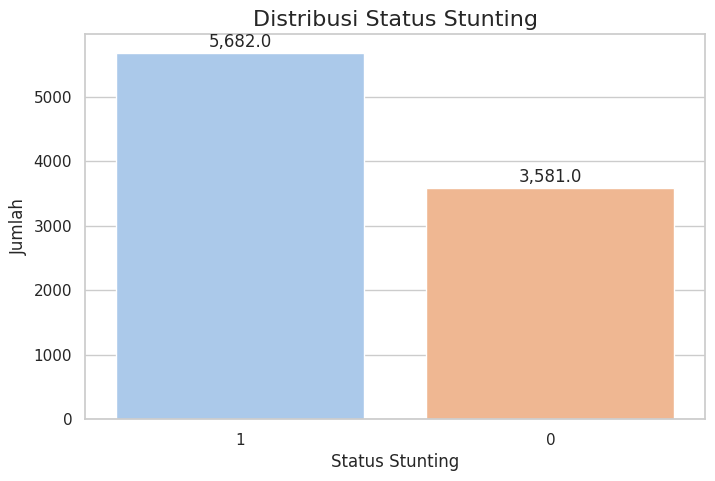

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tampilan grafik
sns.set(style="whitegrid")

# Buat countplot
plt.figure(figsize=(8,5))
sns.countplot(x='status_stunting', data=df, order=df['status_stunting'].value_counts().index, palette='pastel')

# Tambahkan judul dan label
plt.title('Distribusi Status Stunting', fontsize=16)
plt.xlabel('Status Stunting', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan jumlah masing-masing kategori di atas bar
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 8),
        textcoords = 'offset points'
    )

# Tampilkan plot
plt.show()


## Model Prediksi Stunting dengan K-Nearest Neighbors (KNN)

In [27]:
df.columns

Index(['jenis_kelamin', 'umur_bulan', 'berat_lahir', 'tinggi_lahir',
       'berat_badan', 'tinggi_badan', 'asi_eksklusif', 'z_score', 'hasil',
       'status_stunting'],
      dtype='object')

In [28]:
# --- 1. Import Library ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# --- 2. Pilih Fitur dan Target ---
fitur = ['berat_lahir', 'tinggi_lahir', 'asi_eksklusif']
target = 'status_stunting'

# Pastikan ambil dari df2 sesuai fitur yang diinginkan
X = df[fitur]

# Target tetap diambil dari df (bukan df2) karena df2 tadi tidak punya target
y = df[target]

# --- 3. Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 5. Train Model KNN ---
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [29]:
# 6. Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi di data test
y_pred = model_knn.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.5974

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.20      0.28       730
           1       0.62      0.86      0.72      1123

    accuracy                           0.60      1853
   macro avg       0.55      0.53      0.50      1853
weighted avg       0.56      0.60      0.55      1853


Confusion Matrix:
[[143 587]
 [159 964]]


In [30]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif,z_score,hasil,status_stunting
0,1,17,3.0,49,10.0,72.2,0,-3.33,Gizi Buruk,1
1,0,11,2.9,49,2.9,65.0,0,-3.25,Gizi Buruk,1
2,1,16,2.9,49,8.5,72.2,0,-3.08,Gizi Buruk,1
4,1,15,3.1,49,10.5,49.0,0,-11.58,Gizi Buruk,1
5,0,11,2.8,49,8.5,65.0,0,-3.25,Gizi Buruk,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,-6.19,Gizi Buruk,1
9996,0,12,2.8,48,7.7,63.0,0,-4.58,Gizi Buruk,1
9997,1,16,2.8,49,7.7,49.0,0,-12.00,Gizi Buruk,1
9998,1,14,2.8,49,10.0,69.0,0,-3.60,Gizi Buruk,1


In [31]:
# Prediksi

# Prediksi untuk seluruh data
df['prediksi'] = model_knn.predict(X_scaled)  # Use model_knn and scaled data
# Probabilitas prediksi kelas 1 (stunting)
df['probabilitas'] = model_knn.predict_proba(X_scaled)[:, 1]  # Probabilitas stunting (kelas 1)

<ipython-input-31-2320bfe1e5cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediksi'] = model_knn.predict(X_scaled)  # Use model_knn and scaled data
<ipython-input-31-2320bfe1e5cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['probabilitas'] = model_knn.predict_proba(X_scaled)[:, 1]  # Probabilitas stunting (kelas 1)


In [32]:
# Risiko dalam format teks dengan 3 kategori
def kategori_risiko(p):
    persen = round(p * 100)
    if persen <= 30:
        return f"Risiko rendah: {persen}%", "Anak Anda berada dalam kategori risiko rendah terkena stunting."
    elif persen <= 70:
        return f"Risiko sedang: {persen}%", "Anak Anda berada dalam kategori risiko sedang. Tetap jaga pola makan dan nutrisi anak Anda."
    else:
        return f"Risiko tinggi: {persen}%", "Anak Anda berada dalam kategori risiko tinggi. Segera konsultasikan ke ahli gizi atau puskesmas terdekat."

df['risiko_stunting'] = df['probabilitas'].apply(kategori_risiko)


<ipython-input-32-af4f8ce61cac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risiko_stunting'] = df['probabilitas'].apply(kategori_risiko)


In [33]:
df

,jenis_kelamin,umur_bulan,berat_lahir,tinggi_lahir,berat_badan,tinggi_badan,asi_eksklusif,z_score,hasil,status_stunting,prediksi,probabilitas,risiko_stunting
0,1,17,3.0,49,10.0,72.2,0,-3.33,Gizi Buruk,1,1,0.6,"(Risiko sedang: 60%, Anak Anda berada dalam ka..."
1,0,11,2.9,49,2.9,65.0,0,-3.25,Gizi Buruk,1,1,0.8,"(Risiko tinggi: 80%, Anak Anda berada dalam ka..."
2,1,16,2.9,49,8.5,72.2,0,-3.08,Gizi Buruk,1,1,0.8,"(Risiko tinggi: 80%, Anak Anda berada dalam ka..."
4,1,15,3.1,49,10.5,49.0,0,-11.58,Gizi Buruk,1,0,0.4,"(Risiko sedang: 40%, Anak Anda berada dalam ka..."
5,0,11,2.8,49,8.5,65.0,0,-3.25,Gizi Buruk,1,1,0.6,"(Risiko sedang: 60%, Anak Anda berada dalam ka..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,-6.19,Gizi Buruk,1,1,0.6,"(Risiko sedang: 60%, Anak Anda berada dalam ka..."
9996,0,12,2.8,48,7.7,63.0,0,-4.58,Gizi Buruk,1,1,0.8,"(Risiko tinggi: 80%, Anak Anda berada dalam ka..."
9997,1,16,2.8,49,7.7,49.0,0,-12.00,Gizi Buruk,1,1,0.6,"(Risiko sedang: 60%, Anak Anda berada dalam ka..."
9998,1,14,2.8,49,10.0,69.0,0,-3.60,Gizi Buruk,1,1,0.6,"(Risiko sedang: 60%, Anak Anda berada dalam ka..."


## Evaluasi dan Akurasi

In [34]:
# Akurasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score (jika klasifikasi biner)
y_proba = model_knn.predict_proba(X_test)[:, 1] # Changed model to model_knn
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.5974096060442525
Precision: 0.6215344938749194
Recall: 0.8584149599287623
F1 Score: 0.7210172026925954
Confusion Matrix:
 [[143 587]
 [159 964]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.20      0.28       730
           1       0.62      0.86      0.72      1123

    accuracy                           0.60      1853
   macro avg       0.55      0.53      0.50      1853
weighted avg       0.56      0.60      0.55      1853

ROC AUC Score: 0.5333798899718222


## Visualisasi



**lmplot: Hubungan Umur vs Tinggi Badan berdasarkan Status Gizi dan Jenis Kelamin**



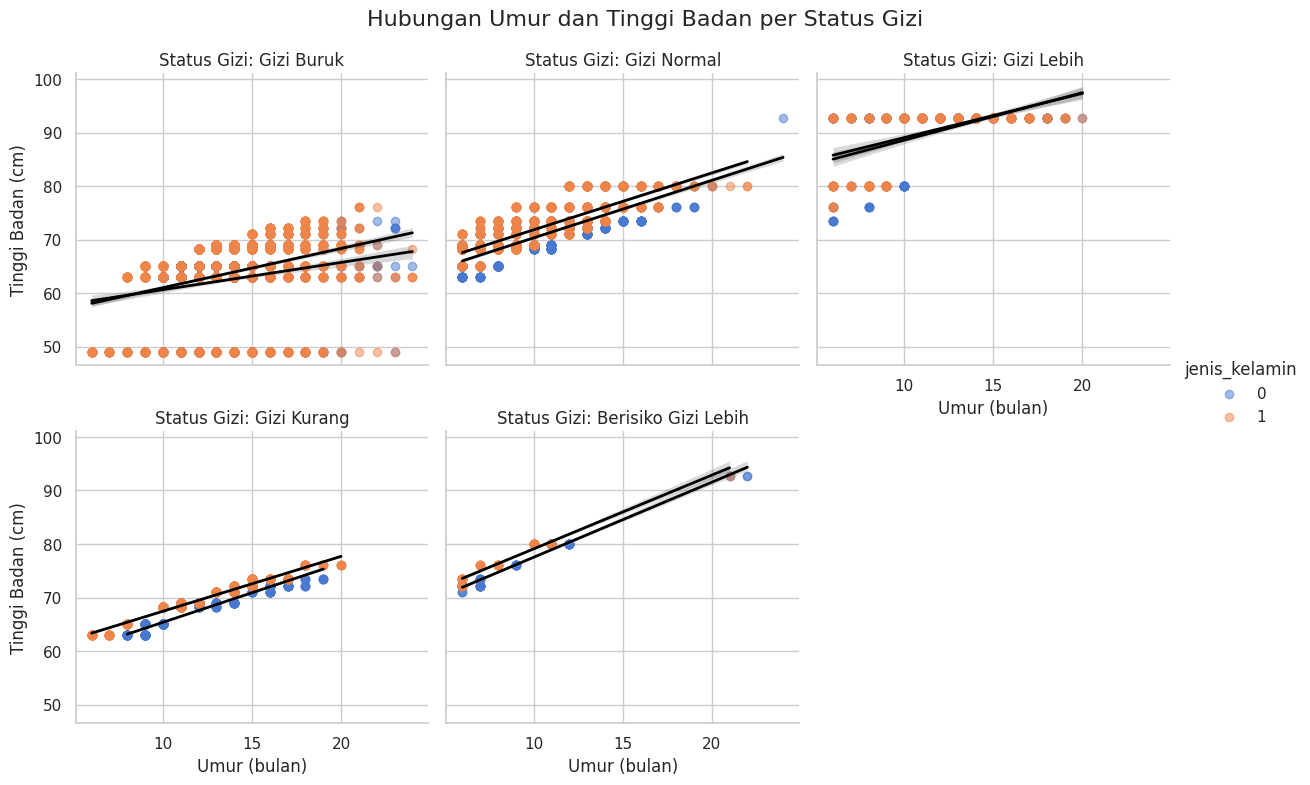

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Replace 'status_gizi' with 'hasil' or 'status_stunting'
g = sns.lmplot(
    data=df,
    x='umur_bulan',
    y='tinggi_badan',
    col='hasil',  # Or 'status_stunting' if you want to visualize based on that column
    hue='jenis_kelamin',
    col_wrap=3,
    palette='muted',
    height=4,
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'black', 'linewidth': 2}
)

g.set_titles("Status Gizi: {col_name}")
g.set_axis_labels("Umur (bulan)", "Tinggi Badan (cm)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Hubungan Umur dan Tinggi Badan per Status Gizi", fontsize=16)
plt.show()

* Visual ini menunjukkan bagaimana pertumbuhan tinggi badan berkorelasi dengan umur anak.
* Dibagi per status gizi (hasil) dan jenis kelamin.
* Garis hitam menunjukkan tren pertumbuhan.

**Histogram: Distribusi Tinggi Badan**

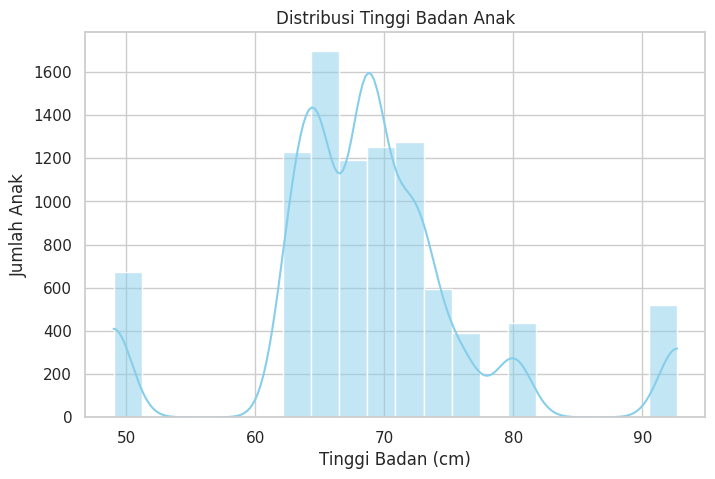

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['tinggi_badan'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Tinggi Badan Anak')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Jumlah Anak')
plt.grid(True)
plt.show()


* Ini menunjukkan sebaran tinggi badan anak.

* Gunanya: Mengetahui apakah datanya condong ke kiri/kanan.

* Sangat relevan untuk melihat dominasi kelompok tertentu.

**Pie Chart: Proporsi Anak Stunting vs Tidak Stunting**

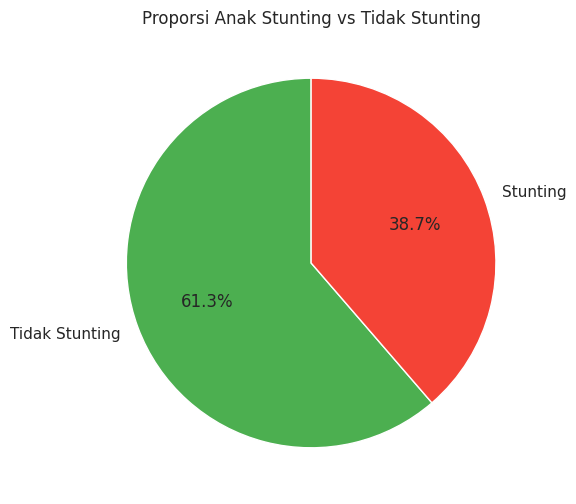

In [37]:
# Pie Chart
stunting_counts = df['status_stunting'].value_counts()
labels = ['Tidak Stunting', 'Stunting']
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(stunting_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporsi Anak Stunting vs Tidak Stunting')
plt.show()


Berdasarkan histogram tersebut, terlihat bahwa sekitar 38.7% anak diprediksi memiliki risiko stunting dan sisanya 61.3% anak diprediksi tidak berisiko stunting.

**Boxplot: Tinggi Badan berdasarkan Status Stunting**

<ipython-input-38-95c7533817c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status_stunting', y='tinggi_badan', palette='Set2')


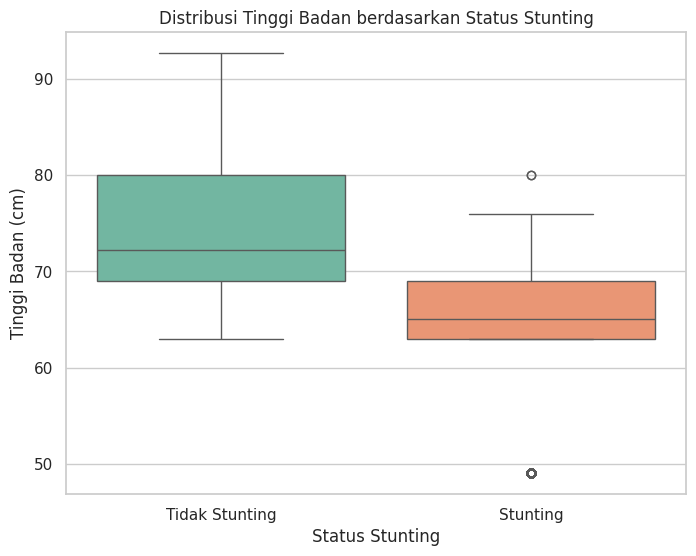

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='status_stunting', y='tinggi_badan', palette='Set2')
plt.title('Distribusi Tinggi Badan berdasarkan Status Stunting')
plt.xticks([0, 1], ['Tidak Stunting', 'Stunting'])
plt.xlabel('Status Stunting')
plt.ylabel('Tinggi Badan (cm)')
plt.show()


* Visual ini menunjukkan perbedaan distribusi tinggi badan antara anak stunting vs tidak.

**Countplot: Stunting Berdasarkan Jenis Kelamin**

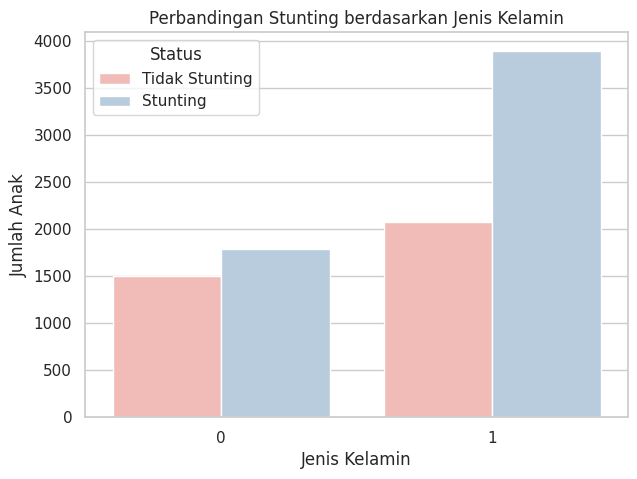

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='jenis_kelamin', hue='status_stunting', palette='Pastel1')
plt.title('Perbandingan Stunting berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Anak')
plt.legend(title='Status', labels=['Tidak Stunting', 'Stunting'])
plt.show()


**Scatter Plot: Tinggi vs Umur berdasarkan Status Stunting**

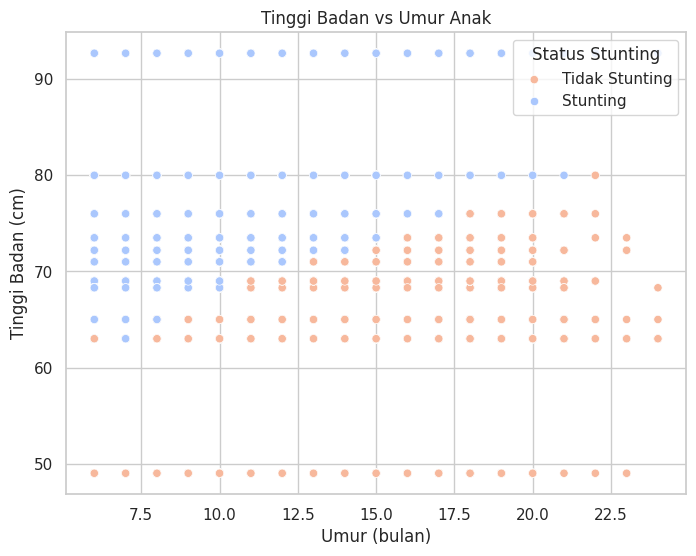

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='umur_bulan', y='tinggi_badan', hue='status_stunting', palette='coolwarm')
plt.title('Tinggi Badan vs Umur Anak')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.legend(title='Status Stunting', labels=['Tidak Stunting', 'Stunting'])
plt.grid(True)
plt.show()


## Eksperimen

In [46]:
# --- Input User ---
print("=== Form Cek Risiko Stunting Anak ===")
tinggi = float(input("Masukkan tinggi badan anak (cm): "))
berat = float(input("Masukkan berat badan anak (kg): "))
umur = int(input("Masukkan usia anak (bulan): "))
jenis_kelamin = input("Jenis kelamin anak (L/P): ").upper()
asi_input = input("Apakah anak mendapatkan ASI eksklusif? (Ya/Tidak): ").lower()

=== Form Cek Risiko Stunting Anak ===
Masukkan tinggi badan anak (cm): 65
Masukkan berat badan anak (kg): 8.5
Masukkan usia anak (bulan): 11
Jenis kelamin anak (L/P): P
Apakah anak mendapatkan ASI eksklusif? (Ya/Tidak): Tidak


In [47]:
# Encode jenis kelamin dan ASI
jenis_kelamin_encoded = 1 if jenis_kelamin == 'L' else 0
asi_eksklusif_encoded = 1 if asi_input == 'ya' else 0

In [48]:
# --- Prediksi ---
fitur_input = pd.DataFrame([[berat, tinggi, asi_eksklusif_encoded]], columns=['berat_lahir', 'tinggi_lahir', 'asi_eksklusif'])
fitur_scaled = scaler.transform(fitur_input)
proba = model_knn.predict_proba(fitur_scaled)[0][1]
klasifikasi, pesan = kategori_risiko(proba)

In [49]:
# --- Output ---
print("\n=== Hasil Prediksi ===")
print(f"Persentase Risiko Stunting: {klasifikasi}")
print(f"{pesan}")


=== Hasil Prediksi ===
Persentase Risiko Stunting: Risiko sedang: 60%
Anak Anda berada dalam kategori risiko sedang. Tetap jaga pola makan dan nutrisi anak Anda.


In [50]:
# --- Navigasi ---
lanjut = input("\nLanjut ke tips nutrisi? (Ya/Tidak): ").lower()
if lanjut == "ya":
    print("\n=== Tips Nutrisi Sesuai Risiko ===")
    if "tinggi" in klasifikasi:
        print("→ Nutrisi tambahan: Protein hewani, vitamin A, dan zat besi tinggi.")
    elif "sedang" in klasifikasi:
        print("→ Nutrisi seimbang: MPASI bergizi dan ASI diteruskan hingga 2 tahun.")
    else:
        print("→ Pertahankan asupan nutrisi dan pemantauan rutin.")

    lanjut2 = input("\nLanjut ke video edukasi? (Ya/Tidak): ").lower()
    if lanjut2 == "ya":
        print("\n=== Video Edukasi ===")
        print("🎥 Video: Cara Menyusun Menu Seimbang untuk Anak Stunting.")
        print("🎥 Video: Tanda-Tanda Anak Mengalami Stunting.")
    else:
        print("\nKembali ke halaman utama.")
else:
    print("\nKembali ke halaman utama.")


Lanjut ke tips nutrisi? (Ya/Tidak): YA

=== Tips Nutrisi Sesuai Risiko ===
→ Nutrisi seimbang: MPASI bergizi dan ASI diteruskan hingga 2 tahun.

Lanjut ke video edukasi? (Ya/Tidak): Ya

=== Video Edukasi ===
🎥 Video: Cara Menyusun Menu Seimbang untuk Anak Stunting.
🎥 Video: Tanda-Tanda Anak Mengalami Stunting.
